In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import imutils
from google.colab.patches import cv2_imshow
from sklearn.metrics.pairwise import pairwise_distances_argmin
import seaborn as sns 
from sklearn import metrics

In [33]:
clusters = 5

In [34]:
img = cv2.imread('/content/sample_data/t4.jpeg')

In [35]:
print(img)


[[[ 33  51  38]
  [ 50  68  55]
  [ 66  84  71]
  ...
  [123 130 123]
  [108 113 104]
  [103 108  99]]

 [[ 10  28  15]
  [ 40  58  45]
  [ 77  95  82]
  ...
  [119 127 117]
  [106 111 102]
  [101 107  96]]

 [[ 44  61  48]
  [ 51  68  55]
  [ 65  82  69]
  ...
  [112 120 109]
  [103 109  98]
  [ 99 106  93]]

 ...

 [[  9  20  17]
  [  0   9   6]
  [ 14  23  20]
  ...
  [ 67  76 103]
  [ 74  83 110]
  [ 86  95 122]]

 [[ 13  24  21]
  [  8  19  16]
  [ 27  36  33]
  ...
  [ 89 100 127]
  [ 99 110 138]
  [ 96 107 135]]

 [[ 20  31  28]
  [ 10  21  18]
  [ 22  31  28]
  ...
  [108 119 146]
  [108 118 148]
  [ 95 105 135]]]


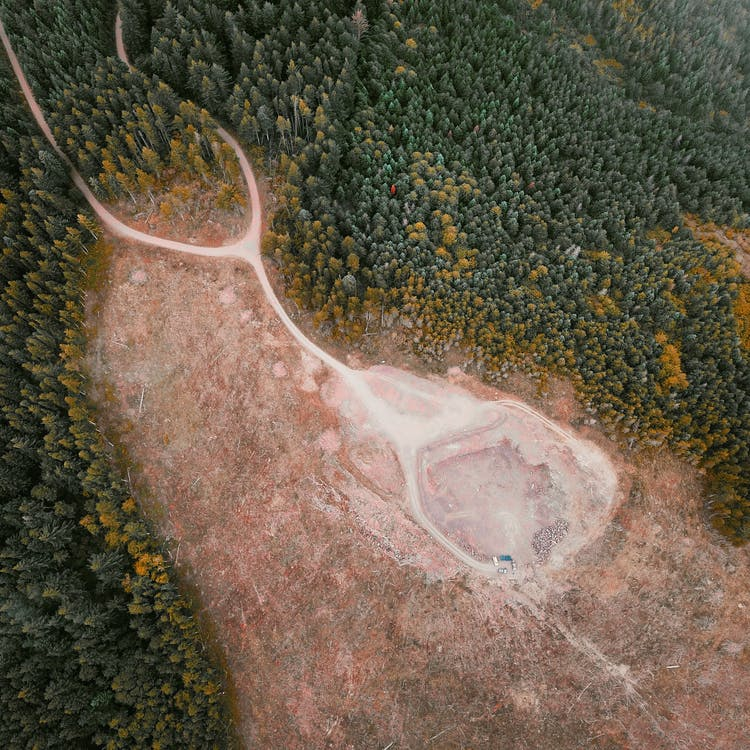

In [36]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [37]:
dimensions = img.shape

In [38]:
height = img.shape[0]
width  = img.shape[1]
channels = img.shape[2]

In [39]:
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Dimension    :  (750, 750, 3)
Image Height       :  750
Image Width        :  750
Number of Channels :  3


In [40]:
org_img = img.copy()
print('Orginal image shape  =  ',img.shape)

Orginal image shape  =   (750, 750, 3)


In [41]:
img = imutils.resize(img,height=185)
print('After resizing shape --> ',img.shape)

After resizing shape -->  (185, 185, 3)


In [42]:
flat_img = np.reshape(img,(-1,3))
print('After Flattening shape --> ',flat_img.shape)

After Flattening shape -->  (34225, 3)


**With Mini Batch K-means**

In [43]:
batch_size = 30

In [44]:
mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=clusters,
    batch_size=batch_size,
    n_init=10,
    max_no_improvement=10,
    verbose=0,
)

In [45]:
mbk.fit(flat_img)

MiniBatchKMeans(batch_size=30, n_clusters=5, n_init=10)

In [46]:
dominant_colors = np.array(mbk.cluster_centers_,dtype='uint')

In [47]:
percentages = (np.unique(mbk.labels_,return_counts=True)[1])/flat_img.shape[0]

In [48]:
p_and_c = zip(percentages,dominant_colors)
p_and_c = sorted(p_and_c,reverse=True)

In [49]:
block = np.zeros((50,70,3),dtype='uint')
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

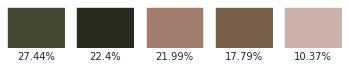

In [50]:
x = [] 
for i in range(clusters):
    plt.subplot(1,clusters,i+1)
    block[:] = p_and_c[i][1][::-1] 
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')
    x.append(float(round(p_and_c[i][0]*100,2)))

In [51]:
print(x)

[27.44, 22.4, 21.99, 17.79, 10.37]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Range of proportion')

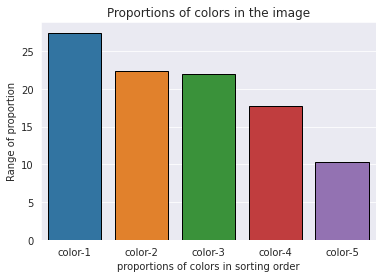

In [52]:
sns.set_style('darkgrid')
tick_label = ['color-1', 'color-2', 'color-3', 'color-4', 'color-5']
sns.barplot(tick_label,x, edgecolor='k')
plt.title('Proportions of colors in the image')
plt.xlabel('proportions of colors in sorting order')
plt.ylabel('Range of proportion')

# **Performance Evaluation**

**Davies-Bouldin Index**

If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

In [53]:
from sklearn.metrics import davies_bouldin_score

In [54]:
labels = mbk.labels_
davies_bouldin_score(flat_img, labels)

0.6630057247427598

**Silhouette Coefficient**

If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient s for a single sample is then given as:

 
The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

**Advantages :**
The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

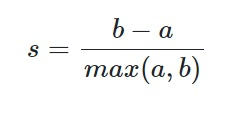

In [55]:
metrics.silhouette_score(flat_img, labels, metric='euclidean')

0.4590306852044126

In [56]:
metrics.silhouette_score(flat_img, labels, metric='manhattan')

0.4701225399323649

In [57]:
metrics.silhouette_score(flat_img, labels, metric='hamming') #hamming used to measure number of dissimilar components

0.018270996770533666